In [1]:

# Churn analysis, often used in the context of customer churn, involves identifying and predicting the 
# customers who are likely to stop using a product or service. Here's a simple example using scikit-learn 
# in Python for a hypothetical dataset.


In [12]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

pd.set_option('display.max_rows', None)


# Assuming you have a dataset with features and a binary target variable 'Churn' (1 for churn, 0 for no churn)
# Set seed for reproducibility
np.random.seed(42)

# Generate random sample data
data = {
    'CustomerID': np.arange(1, 10001),
    'Age': np.random.randint(18, 65, size=10000),
    'MonthlySpend': np.random.uniform(20, 200, size=10000),
    'ContractMonths': np.random.randint(1, 25, size=10000),
    'Churn': np.random.choice([0, 1], size=10000, p=[0.8, 0.2])
}

df = pd.DataFrame(data)

# Display the DataFrame
print(df.head())


# Assume 'Churn' is the target variable
X = df.drop('Churn', axis=1)
y = df['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a pipeline for preprocessing and modeling
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values
    ('scaler', StandardScaler()),  # Standardize features
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))  # Random Forest Classifier
])


# Train the model using the pipeline
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


   CustomerID  Age  MonthlySpend  ContractMonths  Churn
0           1   56     89.772433              11      0
1           2   46     78.174965               6      0
2           3   32    188.328543               4      1
3           4   60     85.398063               9      0
4           5   25     90.251824               9      0
Accuracy: 0.80


In [13]:

# Print classification report and confusion matrix
print('Classification Report:')
print(classification_report(y_test, y_pred))

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.99      0.89      1605
           1       0.20      0.01      0.02       395

    accuracy                           0.80      2000
   macro avg       0.50      0.50      0.45      2000
weighted avg       0.68      0.80      0.72      2000

Confusion Matrix:
[[1589   16]
 [ 391    4]]


In [14]:

### How can we interpret the Confusion Matrix?

# A confusion matrix is a table that is often used to describe the performance of a classification model on a set of 
# data for which the true values are known. It provides a summary of the model's predictions and the actual outcomes.

# In the context of a binary classification problem (such as churn prediction with classes "churn" and "no churn"), 
# a confusion matrix has four entries:


# True Positive (TP): The number of instances where the model correctly predicted "churn" (positive class).

# True Negative (TN): The number of instances where the model correctly predicted "no churn" (negative class).

# False Positive (FP): The number of instances where the model incorrectly predicted "churn" when the actual class 
# was "no churn." Also known as a Type I error.

# False Negative (FN): The number of instances where the model incorrectly predicted "no churn" when the actual 
# class was "churn." Also known as a Type II error.
        
    
# Accuracy: (TP + TN) / (TP + TN + FP + FN) - Overall accuracy of the model.

# Precision: TP / (TP + FP) - The proportion of true positive predictions among all positive predictions. It 
# indicates the accuracy of positive predictions.

# Recall: TP / (TP + FN) - The proportion of actual positives that were 
# correctly predicted by the model.

# Specificity: TN / (TN + FP) - The proportion of actual negatives that were correctly predicted by the model.

# F1 Score: 2 * (Precision * Recall) / (Precision + Recall) - A harmonic mean of precision and recall, balancing 
# the two metrics.


# These metrics help you understand different aspects of the model's performance. For example, high precision 
 #indicates that the model has a low rate of false positives, while high recall suggests a low rate of false negatives.


# In the context of churn analysis, you might be particularly interested in minimizing false negatives (customers 
# who actually churn but are not identified) to ensure that you take proactive measures to retain as many 
# potentially churning customers as possible.


In [15]:

### Finally, we nned to map y_pred back to the original DataFrame based on indices!!!

# You made predictions on a subset of your data, possibly the testing set. 
# Your_subset_indices refers to the indices of the subset of your original DataFrame for which you 
# made predictions. These indices might correspond to the testing set indices or any other subset 
# you chose to make predictions on.

# If you used a train-test split, you might have the testing set indices stored separately. 
# For example, if you used train_test_split from scikit-learn, you can access the testing set 
# indices using the .index attribute of the test set.

# Assuming you have a DataFrame 'df' and 'y_pred' containing predictions
# Extract the subset of the original DataFrame that corresponds to the predictions

your_subset_indices = X_test.index
subset_df = df.loc[df.index.isin(your_subset_indices)]

print(subset_df.shape)

# Check if the lengths match before adding the column
if len(subset_df) == len(y_pred):
    subset_df['PredictedChurn'] = y_pred
    predicted_churners = subset_df[subset_df['PredictedChurn'] == 1]
    print(predicted_churners)
else:
    print("Error: Subset DataFrame and y_pred have different lengths.")
    

(2000, 5)
      CustomerID  Age  MonthlySpend  ContractMonths  Churn  PredictedChurn
265          266   18    170.903523               2      0               1
1347        1348   53     30.152244               1      0               1
1575        1576   43     96.307496               3      0               1
1793        1794   25    170.140085              11      0               1
2236        2237   43    187.465998               1      1               1
3470        3471   55     70.267750              17      0               1
3846        3847   40    122.147458              19      0               1
4130        4131   37    153.950779               2      0               1
5212        5213   38     24.343900              21      1               1
5323        5324   34     58.741892               2      1               1
5454        5455   51    127.619289               1      0               1
5576        5577   42    143.385065              18      0               1
6223        622

C:\Users\ryan_\AppData\Local\Temp\ipykernel_24532\4093404802.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['PredictedChurn'] = y_pred


In [17]:

# Assuming you have obtained 'your_subset_indices' and 'predicted_churners'
predicted_churners_original = df.iloc[your_subset_indices].loc[predicted_churners.index]

# Create a new column 'PredictedChurn' and initialize with NaN
df['PredictedChurn'] = np.nan

# Map the predicted churners back to the original DataFrame
df.loc[predicted_churners_original.index, 'PredictedChurn'] = 1

# Fill NaN values with 0 for non-churners
df['PredictedChurn'].fillna(0, inplace=True)

# Display the DataFrame with the new column
print(df.shape)


(10000, 6)


In [ ]:

# The end game in churn analysis is to identify customers who are at a higher risk of churning and take proactive 
# measures to retain them. Once you've identified potential churners using your model, you can implement various 
# retention strategies. Here are some common approaches:

# 1. Incentives and Discounts: Offer special incentives, discounts, or exclusive deals to customers who are 
# identified as likely to churn. This could be in the form of personalized coupons, loyalty rewards, or 
# special promotions.

# 2. Personalized Communication: Reach out to customers with personalized communication. Send targeted emails, 
# messages, or notifications to address their specific concerns, provide assistance, or showcase new features 
# that might be relevant to them.

# 3. Feedback and Surveys: Collect feedback from customers who are considering leaving. Understand the reasons 
# behind their potential churn and use this information to improve your product or service.

# 4. Customer Support Intervention: Proactively engage with potentially churning customers through customer 
# support channels. Offer assistance, address issues, and ensure they have a positive experience.

# 5. Retention Campaigns: Run targeted retention campaigns that focus on providing value to specific customer 
# segments. This could involve showcasing new features, highlighting the benefits of your product, or offering 
# limited-time promotions.

# 6. Enhanced Customer Experience: Invest in improving overall customer experience. A positive customer 
# experience can contribute significantly to customer retention. Ensure that your product or service meets 
# and exceeds customer expectations.

# 7 Subscription Plan Adjustments: If applicable, consider adjusting subscription plans based on the needs 
# and feedback of potentially churning customers. This could involve providing more flexibility, additional 
# services, or adjusting pricing.

# 8. Customer Loyalty Programs: Implement loyalty programs that reward customers for their continued use of 
# your product or service. Loyalty points, exclusive access, or special privileges can incentivize customers to stay.

# The specific strategy will depend on your business model, industry, and the nature of your product or service. 
# Churn analysis is a crucial step in reducing customer attrition and maximizing customer retention. It allows 
# businesses to proactively address potential issues, strengthen customer relationships, and ultimately 
# improve the overall customer lifetime value.


# The specific strategy will depend on your business model, industry, and the nature of your product or service. 
# Churn analysis is a crucial step in reducing customer attrition and maximizing customer retention. It allows 
# businesses to proactively address potential issues, strengthen customer relationships, and ultimately improve 
# the overall customer lifetime value.


<Axes: xlabel='timeline'>

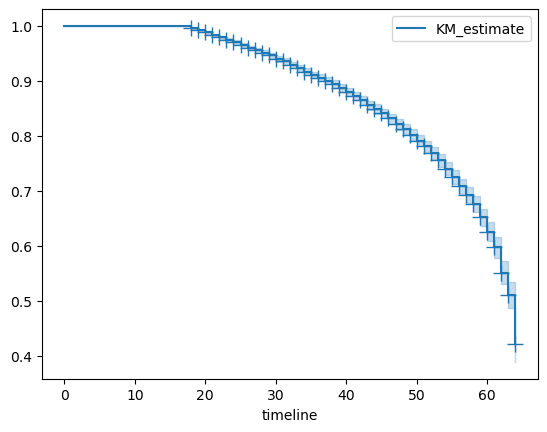

In [19]:

from lifelines import KaplanMeierFitter

# Create a Kaplan-Meier Survival Curve
kmf = KaplanMeierFitter()
kmf.fit(durations=df['Age'], event_observed=df['Churn'])

# Plot the survival curve
kmf.plot_survival_function(show_censors=True)


In [ ]:

# The KaplanMeierFitter is an estimator for the survival function, which gives the probability that an event 
# (e.g., churn) has not occurred up to a certain time point.

# The plot_survival_function method is used to visualize the estimated survival function. The plot typically shows 
# the survival probability over time.

# Setting show_censors=True adds vertical tick marks (censors) at the observed event times.

# Survival Function (y-axis): Represents the probability that a customer has not churned up to a specific time point. 
# Higher values indicate a higher probability of survival (not churning).

# Time (x-axis): Represents the time duration or observation period.

# Censor Marks: Represent censored data points where the event did not occur by the observed time.

# By looking at the survival curve, you can gain insights into the likelihood of customers continuing without 
# churning over time. If the curve drops steeply, it indicates a higher churn rate, whereas a flatter curve 
# suggests a lower churn rate.


In [1]:

# End...
